In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd
import numpy as np

df_train = pd.read_csv('train_kaggle.csv')
df_test = pd.read_csv('sample_solution.csv')
Y = df_train['Label'].values
dataframes = np.load('allData.npy', allow_pickle = True)

In [2]:
def load_test_dataframe(id):
    test_data = np.load("test/test/{}.npy".format(id))
    return pd.DataFrame(data=test_data)

testdatas = []
for id in df_test['Id']:
    dfi = load_test_dataframe(id)
    testdatas.append(dfi.values)

In [3]:
dfLens = []
for df in dataframes:
    dfLens.append(df.shape[0])
np.min(dfLens)

38

In [4]:
def pad_data(dfs):
    padsize = 500
    data = []
    for df in dfs:
        diff = padsize-df.shape[0]
        if diff >0:
            df = np.pad(df, [(0, diff), (0,0)], 'constant')
        else:
            df = df[:padsize]
        data.append(df)
        
    data = np.stack(data)
    return data

XTrain = pad_data(dataframes)
XTest = pad_data(np.array(testdatas))

In [5]:
import sklearn as sk
from sklearn.metrics import pairwise_distances

# Convert time series to image based on https://www.kaggle.com/tigurius/recuplots-and-cnns-for-time-series-classification
#modified from https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

In [6]:
XTrain = np.array(list(map(recurrence_plot, XTrain)))
XTrain.shape

(18662, 100, 100)

In [7]:
XTest = np.array(list(map(recurrence_plot, XTest)))
XTest.shape

(6051, 100, 100)

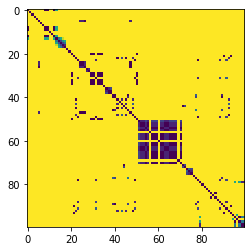

In [8]:
import matplotlib.pyplot as plt

plt.imshow(XTrain[0])

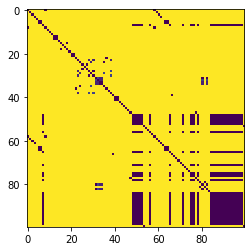

In [9]:
plt.imshow(XTrain[1])

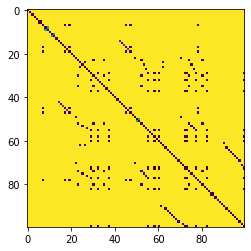

In [10]:
plt.imshow(XTrain[2])

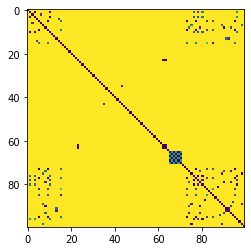

In [11]:
plt.imshow(XTrain[3])

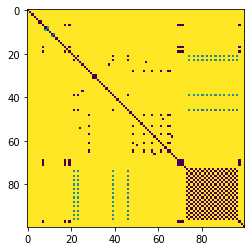

In [12]:
plt.imshow(XTrain[4])

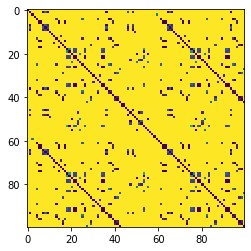

In [13]:
plt.imshow(XTrain[5])

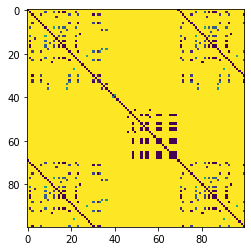

In [14]:
plt.imshow(XTrain[217])

In [15]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

def save_as_image(data, folder, y = []):
    y = np.array(y)
    for i in tqdm(range(data.shape[0])):
        img_id = str(i) + '.png'
        if y.shape[0] == data.shape[0]:
            class_dir = str(y[i])
            class_folder = folder + '/' + class_dir            
        else:
            class_folder = folder
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)
        img_dir = class_folder + '/' + img_id
        plt.figure(figsize=(8, 8))
        plt.imshow(data[i], cmap='binary', origin='lower')
        plt.title('Joint Recurrence Plot', fontsize=16)
        plt.savefig(img_dir, transparent=True)
        plt.close()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(XTrain, Y, test_size=0.2, random_state=42)

  1%|▌                                                    | 160/14929 [00:27<38:15,  6.43it/s]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



KeyboardInterrupt

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x000001E7F0EE6308> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x000001E7F0EE6308> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x000001E7F0EE6308> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x000001E7F0EE6308> returned a result with an error set

The above exception was the direct cause of the following exception:

SystemError: <built-in method write of _io.BufferedWriter object at 0x000001E7F0EE6308> returned a result with an error set

The ab

TypeError: must be str, not list

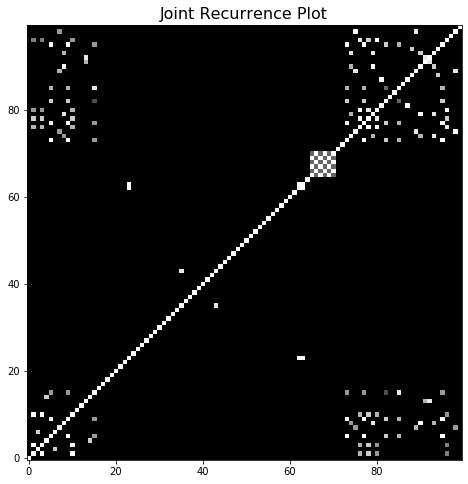

In [17]:
save_as_image(X_train, 'image/train', y_train)

In [ ]:
save_as_image(X_val, 'image/valid', y_val)

In [ ]:
save_as_image(XTest, 'image/test')